## Importações

In [1]:
# Importação das bibliotecas
import pandas as pd
import matplotlib as plt

In [2]:
# Importação do banco de dados CSV
dados = pd.read_csv(r'C:\Users\Usuário\Documents\GitHub\Analise_Dados\DadosVacinaAM.csv', sep=";")

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9128\3544363823.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(r'C:\Users\Usuário\Documents\GitHub\Analise_Dados\DadosVacinaAM.csv', sep=";")


In [3]:
# Listagem das colunas para consulta
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708357 entries, 0 to 1708356
Data columns (total 32 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         object 
 8   paciente_endereco_coPais                  object 
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     object 
 13  paciente_nacionalidade_enumNacionalidade  object 
 14  es

## Tratamento dos dados

In [4]:
# Seleção das colunas a serem analisadas neste projeto
dados = dados.loc[:, ['paciente_idade','paciente_enumSexoBiologico','paciente_racaCor_valor','paciente_endereco_nmMunicipio','vacina_categoria_nome','vacina_fabricante_nome','vacina_dataAplicacao','vacina_descricao_dose']]

# Filtro a partir da 1ª dose
dados_1 = dados.loc[(dados['vacina_descricao_dose'] == '1ª Dose') | (dados['vacina_descricao_dose'] == '1ª Dose Revacinação') | (dados['vacina_descricao_dose'] == '1º Reforço')]

# Retirando informações duplicadas
dados_1.drop_duplicates(inplace=True)

# Excluindo registros com paciente_idade igual a 221.0
dados_1 = dados_1[dados_1['paciente_idade'] != 221.0]

# Resetando o índice do dataframe
dados_1.reset_index(drop=True, inplace=True)

dados_1

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9128\2206176579.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_1.drop_duplicates(inplace=True)


,paciente_idade,paciente_enumSexoBiologico,paciente_racaCor_valor,paciente_endereco_nmMunicipio,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose
0,29.0,F,AMARELA,MANAUS,Faixa Etária,PFIZER,2021-10-21,1ª Dose
1,13.0,F,PARDA,MANAUS,Faixa Etária,PFIZER,2021-08-27,1ª Dose
2,77.0,F,SEM INFORMACAO,MANAUS,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-02-05,1ª Dose
3,66.0,M,BRANCA,MANAUS,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-03-05,1ª Dose
4,4.0,M,PARDA,MANAUS,NaN,SINOVAC/BUTANTAN,2022-11-19,1ª Dose
...,...,...,...,...,...,...,...,...
353195,33.0,M,PARDA,CARAUARI,Faixa Etária,SINOVAC/BUTANTAN,2021-09-13,1ª Dose
353196,64.0,M,SEM INFORMACAO,PINDAMONHANGABA,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-03-11,1ª Dose
353197,14.0,F,AMARELA,ATALAIA DO NORTE,Faixa Etária,PFIZER,2022-01-26,1ª Dose
353198,33.0,F,INDIGENA,MANAUS,Faixa Etária,PFIZER,2021-11-05,1ª Dose


## Quem são as pessoas vacinadas com a 1ª dose (COVID-19) no estado do Amazonas?

In [5]:
# Quantidade de aplicações de 1ª dose da vacina por Idade, em porcentagem
idade = dados_1.paciente_idade.value_counts()
soma_idades = (idade.index * idade).sum()
n_pessoas = idade.sum()
media_idade = soma_idades / n_pessoas
print("A média de idade das pessoas é: {:.2f} anos.".format(media_idade))



A média de idade das pessoas é: 32.72 anos.


In [6]:
# Criando faixas etárias
faixas_etarias = [(0, 11), (12, 17), (18, 29), (30, 39), (40, 49), (50, 59), (60, 69), (70, 79), (80, 89), (90, 99)]

# Contagem de pacientes em cada faixa etária
pacientes_por_faixa = []

for faixa in faixas_etarias:
    pacientes_por_faixa.append(((dados_1['paciente_idade'] >= faixa[0]) & (dados_1['paciente_idade'] <= faixa[1])).sum())

# Criando um dataframe com a contagem de pacientes por faixa etária
df_pacientes_por_faixa = pd.DataFrame({'Faixa_Etária': [f'{faixa[0]}-{faixa[1]}' for faixa in faixas_etarias], 'pacientes': pacientes_por_faixa})
df_pacientes_por_faixa.set_index('Faixa_Etária', inplace=True)

# Quantidade de aplicações de 2ª dose da vacina por faixa etária, em porcentagem
tt_pacientes = df_pacientes_por_faixa['pacientes'].sum()
porcent_p = (df_pacientes_por_faixa['pacientes'] / tt_pacientes) * 100
df_porcent_p = pd.DataFrame({'Porcentagem': porcent_p})

# exibir DataFrame com as porcentagens
df_porcent_p


,Porcentagem
Faixa_Etária,
0-11,13.264933
12-17,10.253781
18-29,25.075562
30-39,17.979667
40-49,14.095479
50-59,9.902244
60-69,5.235099
70-79,2.744029
80-89,1.152906


<Axes: title={'center': 'Vacinas 1ª dose por Faixa Etária, em porcentagem'}, xlabel='Faixa_Etária', ylabel='Porcentagem'>

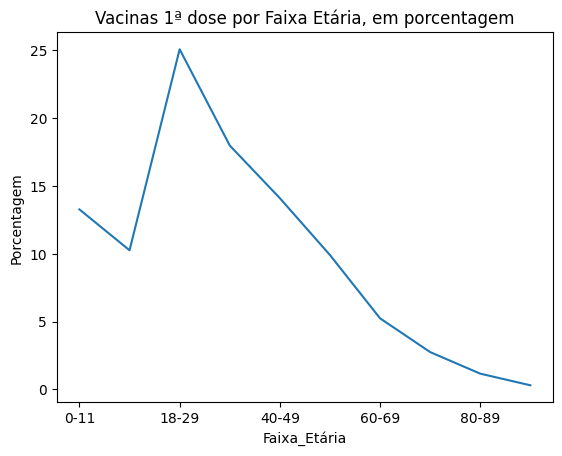

In [7]:
porcent_p.plot(title='Vacinas 1ª dose por Faixa Etária, em porcentagem', xlabel='Faixa_Etária', ylabel='Porcentagem')

<Axes: title={'center': 'Vacinas 1ª dose por Raça, em porcentagem'}>

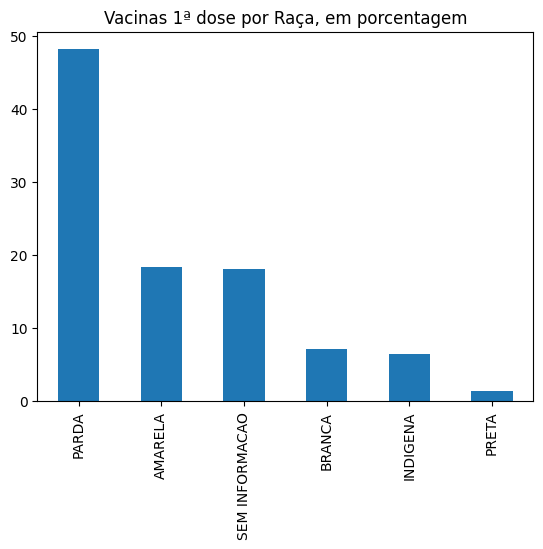

In [8]:
# Quantidade de aplicações de 1ª dose da vacina por Raça, em porcentagem
raça = dados_1.paciente_racaCor_valor.value_counts(normalize=True)
tt_raça = raça.sum()
porcent_raça = (raça/tt_raça)*100
porcent_raça.plot(kind='bar', title='Vacinas 1ª dose por Raça, em porcentagem', ylabel='')

In [9]:
# Quantidade de aplicações de 1ª dose da vacina por sexo, em porcentagem
sexo = dados_1.paciente_enumSexoBiologico.value_counts(normalize=True)
sexo*100

M    50.556797
F    49.442637
I     0.000566
Name: paciente_enumSexoBiologico, dtype: float64

In [10]:
# Quantidade de aplicações de 1ª dose da vacina por Município, em porcentagem
tt_munic = dados_1.paciente_endereco_nmMunicipio.value_counts()
tt_pac = tt_munic.sum()
porcent_munic = (tt_munic/tt_pac)*100
porcent_munic.head()

MANAUS         29.752563
ITACOATIARA     3.258777
MANACAPURU      3.226261
PARINTINS       2.924986
COARI           2.792621
Name: paciente_endereco_nmMunicipio, dtype: float64

In [11]:
# Quantidade total de aplicação da 1ª dose da vacina por população de risco, em porcentagem
pop_risco = dados_1.vacina_categoria_nome.value_counts()
tt_cat = pop_risco.sum()
porcent_pop_risco = (pop_risco/tt_cat)*100
porcent_pop_risco = round(porcent_pop_risco, 2)
porcent_pop_risco

Faixa Etária                                       62.62
Povos e Comunidades Tradicionais                   10.12
Trabalhadores de Saúde                              7.46
Povos Indígenas                                     6.49
Comorbidades                                        5.45
Trabalhadores da Educação                           2.99
Gestantes                                           1.07
Forças de Segurança e Salvamento                    0.66
Forças Armadas (membros ativos)                     0.61
Pessoas com Deficiência                             0.59
Trabalhadores de Transporte                         0.46
Puérperas                                           0.37
População Privada de Liberdade                      0.27
Trabalhadores Portuários                            0.22
Outros                                              0.22
Trabalhadores de Limpeza Urbana                     0.15
Funcionário do Sistema de Privação de Liberdade     0.08
Pessoas de 60 anos ou mais inst

# Problema
Há diferença entre o perfil das pessoas que tomaram a segunda dose no Amazonas? Qual a distância média entre a casa e o local de aplicação? (contabilizar 1 dose e 2 doses e 3 doses)